The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __parametric method__.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress= True)

In [4]:
sp_returns=np.loadtxt('C:/Users/aheed/Desktop/spreturns.csv', delimiter=",",usecols=1)

In [5]:
sp_returns


array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [7]:
mean=sp_returns.mean()

In [9]:
std=sp_returns.std()

In [10]:
initial=100

In [11]:
size=int(252/4)

In [12]:
size

63

__one simulation/path__:

In [13]:
np.random.seed(123)
daily_return=np.random.normal(loc=mean,scale=std,size=size)


In [14]:
daily_return

array([-0.0133,  0.0127,  0.0038, -0.0185, -0.007 ,  0.0209, -0.03  ,
       -0.0051,  0.0161, -0.0106, -0.0082, -0.0009,  0.0189, -0.0077,
       -0.0053, -0.0052,  0.0278,  0.0276,  0.0128,  0.0051,  0.0095,
        0.0189, -0.0114,  0.0149, -0.0154, -0.0077,  0.0116, -0.0176,
       -0.0015, -0.0105, -0.0029, -0.0347, -0.0219, -0.0085,  0.0118,
       -0.0019,  0.0003,  0.0089, -0.0107,  0.0038, -0.0098, -0.0213,
       -0.0046,  0.0074,  0.0045,  0.0001,  0.0301,  0.0054,  0.0125,
        0.0282, -0.0159, -0.0127,  0.022 , -0.0097,  0.0006,  0.0136,
        0.0114,  0.0222,  0.0189,  0.0136, -0.0094,  0.0102,  0.0042])

In [16]:
path=(daily_return+1).cumprod()*initial
path

array([ 98.6713,  99.9263, 100.306 ,  98.4465,  97.7616,  99.8034,
        96.8063,  96.3138,  97.8618,  96.8289,  96.0341,  95.9462,
        97.7583,  97.0047,  96.4929,  95.9954,  98.6648, 101.3849,
       102.6829, 103.2054, 104.1831, 106.15  , 104.9381, 106.5066,
       104.8678, 104.0608, 105.2671, 103.4176, 103.2644, 102.1809,
       101.8821,  98.3496,  96.2006,  95.3857,  96.5157,  96.3323,
        96.3614,  97.2151,  96.1736,  96.5398,  95.5949,  93.5585,
        93.1269,  93.8189,  94.2406,  94.2518,  97.0922,  97.6186,
        98.8376, 101.6258, 100.011 ,  98.7407, 100.9166,  99.9381,
       100.0018, 101.3636, 102.5179, 104.7914, 106.7762, 108.2303,
       107.2151, 108.3077, 108.7616])

these are the returns based on one simulation over a period of next 63 days

In [18]:
path=np.insert(path,0,initial)

In [19]:
path

array([100.    ,  98.6713,  99.9263, 100.306 ,  98.4465,  97.7616,
        99.8034,  96.8063,  96.3138,  97.8618,  96.8289,  96.0341,
        95.9462,  97.7583,  97.0047,  96.4929,  95.9954,  98.6648,
       101.3849, 102.6829, 103.2054, 104.1831, 106.15  , 104.9381,
       106.5066, 104.8678, 104.0608, 105.2671, 103.4176, 103.2644,
       102.1809, 101.8821,  98.3496,  96.2006,  95.3857,  96.5157,
        96.3323,  96.3614,  97.2151,  96.1736,  96.5398,  95.5949,
        93.5585,  93.1269,  93.8189,  94.2406,  94.2518,  97.0922,
        97.6186,  98.8376, 101.6258, 100.011 ,  98.7407, 100.9166,
        99.9381, 100.0018, 101.3636, 102.5179, 104.7914, 106.7762,
       108.2303, 107.2151, 108.3077, 108.7616])

<function matplotlib.pyplot.show(close=None, block=None)>

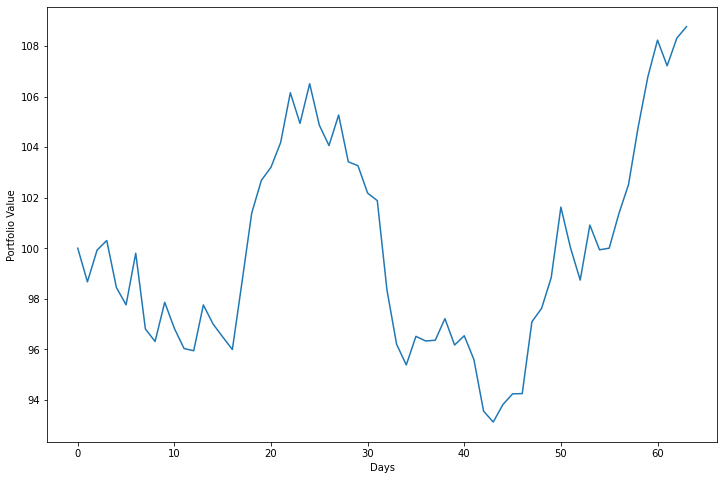

In [20]:
plt.figure(figsize=(12,8))
plt.plot(path)
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show

__ __

__MANY SIMULATIONS/PATHS__

In [22]:
sims=10000
days=63

In [24]:
np.random.seed(123)
returns=np.random.normal(loc=mean,scale=std,size=days*sims).reshape(sims,days)

In [25]:
returns

array([[-0.0133,  0.0127,  0.0038, ..., -0.0094,  0.0102,  0.0042],
       [-0.0163,  0.018 ,  0.0103, ...,  0.0096,  0.0204, -0.0031],
       [ 0.0104,  0.0065,  0.0062, ..., -0.0066, -0.0119, -0.0042],
       ...,
       [-0.0138, -0.0252, -0.0106, ..., -0.0167, -0.0035,  0.007 ],
       [-0.02  , -0.0144,  0.0104, ...,  0.0157, -0.009 , -0.0033],
       [ 0.0056,  0.0106, -0.0144, ...,  0.0022,  0.0233,  0.0092]])

In [30]:
paths=(returns+1).cumprod(axis=1)*initial

In [31]:
paths

array([[ 98.6713,  99.9263, 100.306 , ..., 107.2151, 108.3077, 108.7616],
       [ 98.3709, 100.1378, 101.1738, ...,  96.2126,  98.1706,  97.8657],
       [101.0409, 101.6983, 102.3278, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [ 98.6194,  96.1296,  95.1101, ...,  92.9523,  92.6226,  93.2714],
       [ 98.0049,  96.5935,  97.5958, ..., 109.3675, 108.381 , 108.0192],
       [100.558 , 101.6203, 100.1609, ..., 116.2265, 118.9318, 120.0208]])

In [32]:
paths=np.hstack((np.ones(sims).reshape(sims,1)*100,paths))

In [33]:
paths

array([[100.    ,  98.6713,  99.9263, ..., 107.2151, 108.3077, 108.7616],
       [100.    ,  98.3709, 100.1378, ...,  96.2126,  98.1706,  97.8657],
       [100.    , 101.0409, 101.6983, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [100.    ,  98.6194,  96.1296, ...,  92.9523,  92.6226,  93.2714],
       [100.    ,  98.0049,  96.5935, ..., 109.3675, 108.381 , 108.0192],
       [100.    , 100.558 , 101.6203, ..., 116.2265, 118.9318, 120.0208]])

__creating a function for the task__

In [54]:
def path_simulation(daily_returns,days,initial,sims=10000,seed=123):
    mean=np.mean(daily_returns)
    std=np.std(daily_returns)
    days=int(days)
    
    np.random.seed(seed)
    returns=np.random.normal(loc=mean,scale=std,size=days*sims).reshape(sims,days)
    
    paths=(returns+1).cumprod(axis=1)*initial
    paths=np.hstack((np.ones(sims).reshape(sims,1)*initial,paths))
    return paths

In [ ]:
def path_simul_param(daily_returns, days, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))

In [37]:
paths=path_simulation(sp_returns,63,100)

In [38]:
paths

array([[100.    ,  98.6713,  99.9263, ..., 107.2151, 108.3077, 108.7616],
       [100.    ,  98.3709, 100.1378, ...,  96.2126,  98.1706,  97.8657],
       [100.    , 101.0409, 101.6983, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [100.    ,  98.6194,  96.1296, ...,  92.9523,  92.6226,  93.2714],
       [100.    ,  98.0049,  96.5935, ..., 109.3675, 108.381 , 108.0192],
       [100.    , 100.558 , 101.6203, ..., 116.2265, 118.9318, 120.0208]])

In [39]:
paths.shape

(10000, 64)

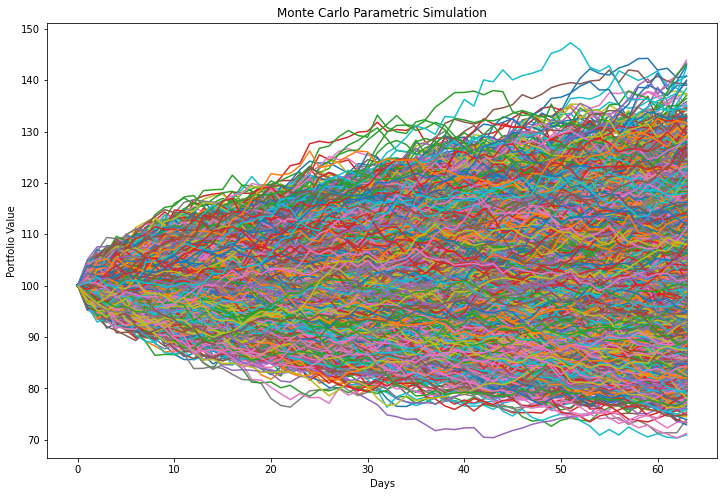

In [41]:
plt.figure(figsize=(12,8))
plt.plot(paths.T)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('Monte Carlo Parametric Simulation')
plt.show()

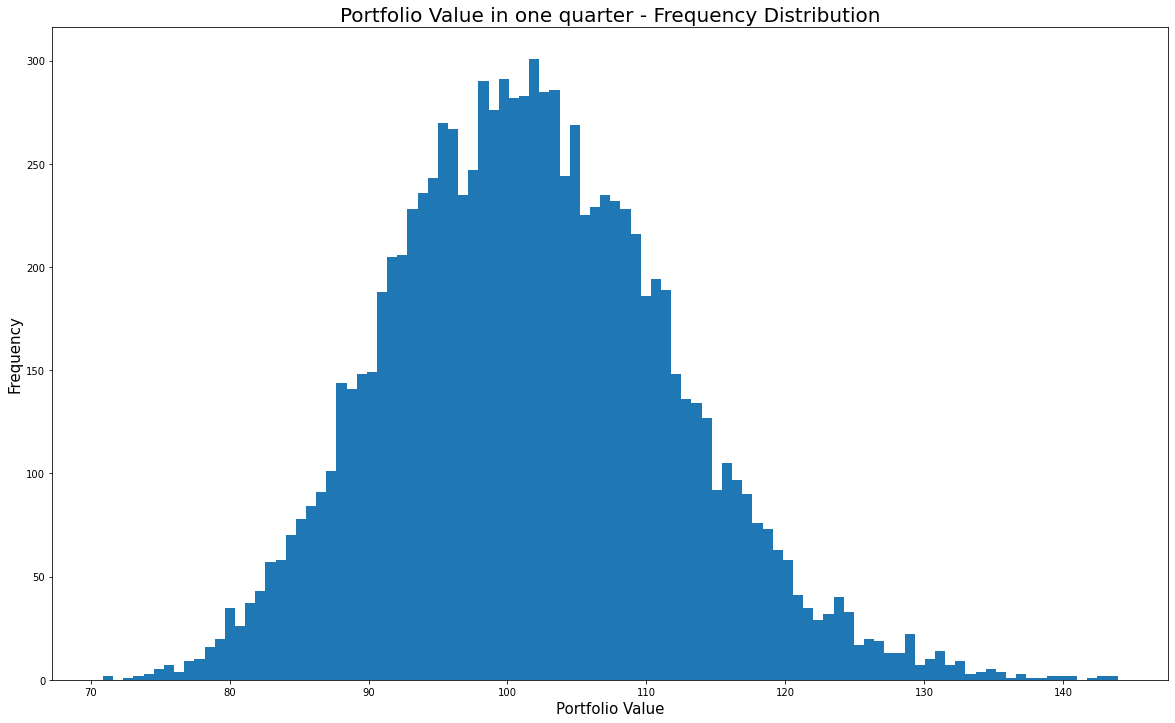

In [42]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Frequency Distribution", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

# MONTE CARLO SIMULATION FOR VaR OF A PORTFOLIO 

In [43]:
sim=1000000
initial=1000000

In [55]:
paths=path_simulation(sp_returns,63,initial,sims=sim)

In [48]:
paths.shape

(1000000, 64)

In [56]:
final_parametric=paths[:,-1]

In [61]:
from matplotlib import ticker

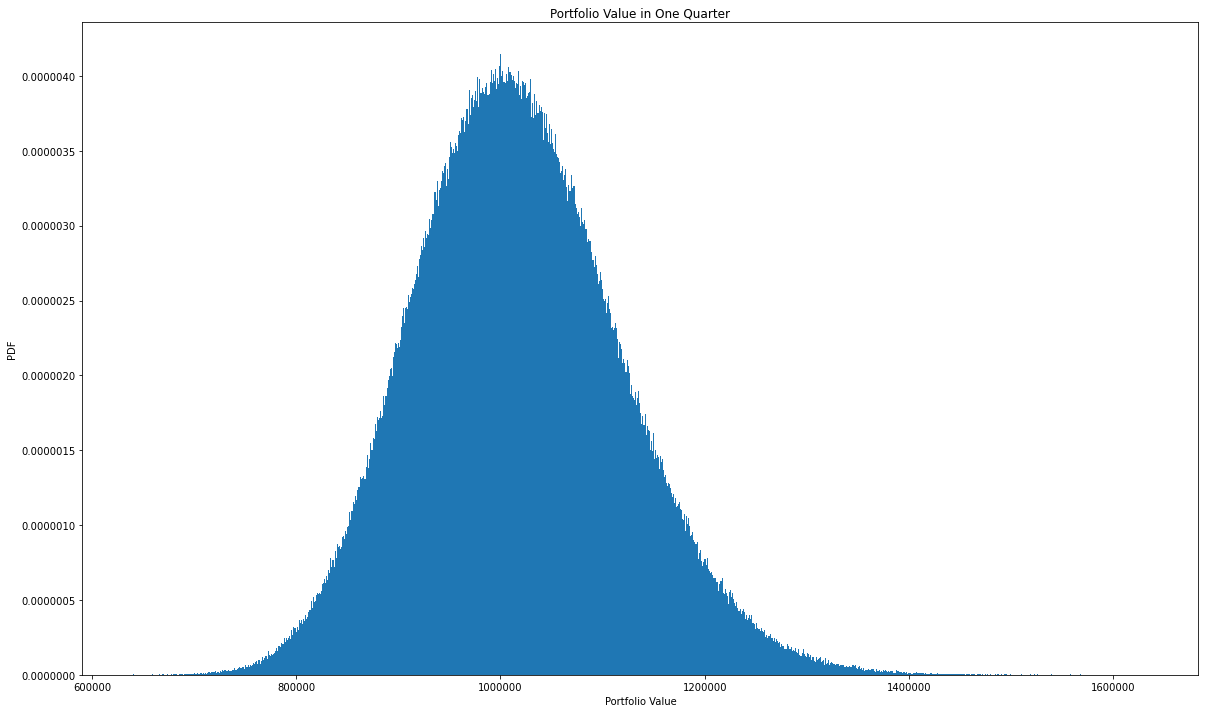

In [64]:
plt.figure(figsize=(20,12))
plt.hist(final_parametric,bins=1000,density=True)
plt.xlabel('Portfolio Value')
plt.ylabel('PDF')
plt.title('Portfolio Value in One Quarter')
plt.ticklabel_format(style='plain')
plt.show()


In [65]:
final_parametric.mean()

1017144.0122875567

In [66]:
np.median(final_parametric)

1012167.4678941949

In [67]:
final_parametric.std()

101091.49984895984

__1% VaR OF $1 MILLION PORTFOLIO OVER ONE QUARTER__

In [72]:
prob=0.01

In [73]:
np.percentile(final_parametric,prob*100)

803317.7491221194

in less than 1% cases we end up w value of less than 803317 usd

In [74]:
var=np.percentile(final_parametric,prob*100)-initial

In [75]:
var

-196682.2508778806

In [76]:
def var_parametric(daily_returns,days,prob,initial,sims=10000,seed=123):
    mean=np.mean(daily_returns)
    std=np.std(daily_returns)
    days=int(days)
    
    np.random.seed(seed)
    ret=np.random.normal(loc=mean,scale=std,size=days*sims).reshape(sims,days)
    
    final=(ret+1).prod(axis=1)*initial
    var=np.percentile(final,prob)-initial
    
    return var

In [77]:
var_parametric(sp_returns,63,prob=1,initial=1000000,sims=1000000)

-196682.2508778806

In [80]:
var_p1=[]
for i in range(1,252+1):
    var_p1.append(-var_parametric(sp_returns,days=i,prob=1,initial=1000000))

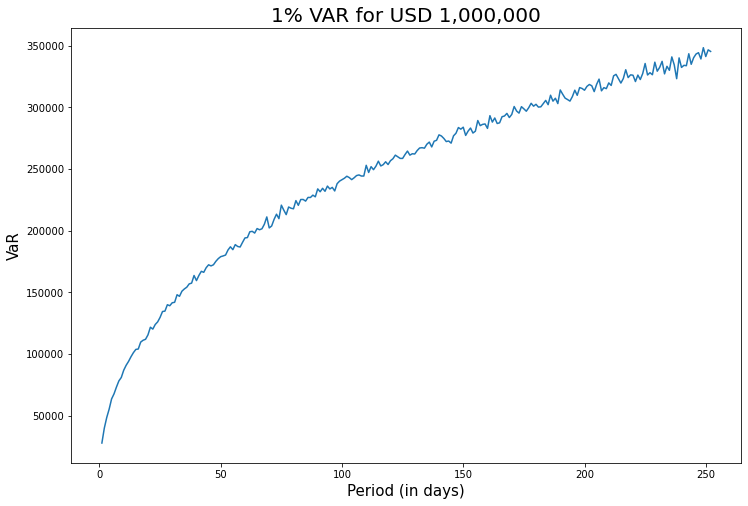

In [81]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_p1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [83]:
var_p2=[]
for i in np.linspace(0.1,5,100):
    var_p2.append(-var_parametric(sp_returns,days=63,prob=i,initial=1000000))
    

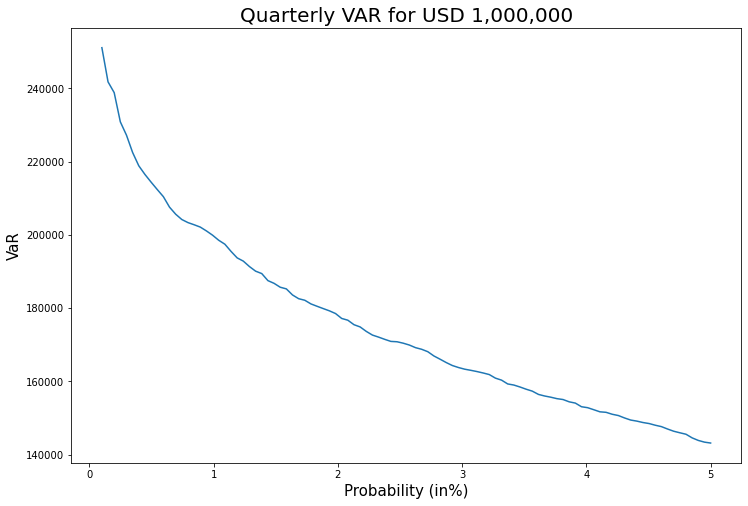

In [84]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2)
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()